# Image filters in racoon
### Import libraries

In [1]:
from scipy import misc
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Seeing image in _scipy_

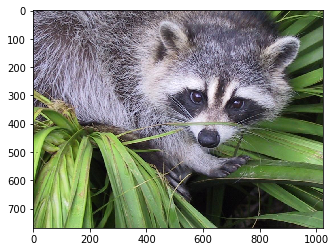

In [2]:
def readImage():
    f = misc.face()
    plt.imshow(f)

readImage()

### Get image

In [3]:
original = misc.face()
original.shape

(768, 1024, 3)

### Get image in gray scale

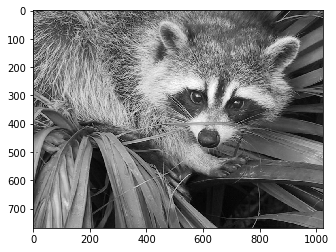

In [4]:
# Get gray scale
def grayScale(original):
    grayScale = np.array(original)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            pixel = np.array(original[i, j])
            pixel = [sum(pixel) / 3] * len(pixel)
            grayScale[i, j] = pixel
            
    return grayScale

grayScale = grayScale(original)

plt.imshow(grayScale)

### Get image with inverted colors

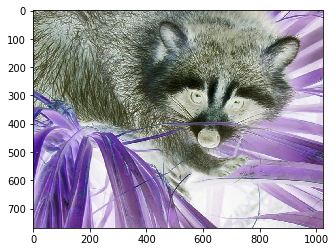

In [5]:
# Get inverted colors
def invertedColors(original):
    inverted = np.array(original)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            pixel = np.array(original[i, j])

            for k in range(len(pixel)):
                pixel[k] = 255 - pixel[k]
            inverted[i, j] = pixel
            
    return inverted

inverted = invertedColors(original)

plt.imshow(inverted)

### Inverted colors with _OpenCV_

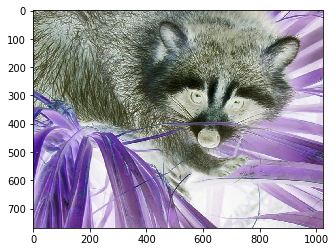

In [6]:
inverted = cv.bitwise_not(original)
plt.imshow(inverted)

### Get image with blur effect

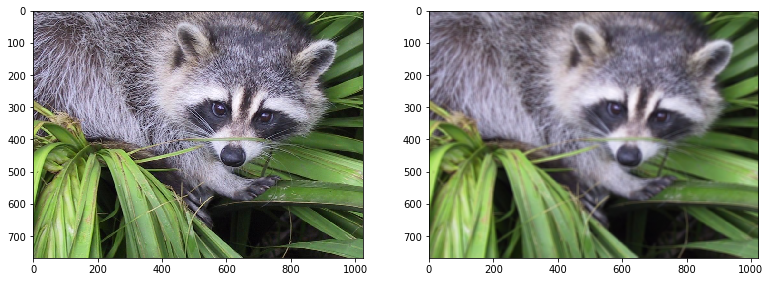

In [7]:
# Get blurred image
def blurredImage(original):
    blurred = np.array(original)

    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            colorR, colorG, colorB = 0, 0, 0
            counter = 0
            
            for k in range(i - 4, i + 5):
                for l in range(j - 4, j + 5):
                    if(k >= 0 and k < blurred.shape[0]):
                        if(l >= 0 and l < blurred.shape[1]):
                            counter += 1
                            colorR += original[k, l, 0]
                            colorG += original[k, l, 1]
                            colorB += original[k, l, 2]

            pixel = np.array([colorR / counter, colorG / counter, colorB / counter])
            blurred[i, j] = pixel
            
    return blurred

#grayScale = grayScale(original)
blurred = blurredImage(original)

fig, axarr = plt.subplots(1, 2, figsize=(13, 13))

axarr[0].imshow(original)
axarr[1].imshow(blurred)

### Set gray scaled image and create black-and-white binary image

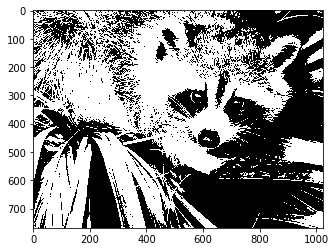

In [8]:
# Get binary image
def getThreshold(original):
    binary = np.array(original)
    allDots = binary.shape[0] * binary.shape[1]
    sumPixels = 0
    
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            sumPixels += original[i, j, 0]
    
    return sumPixels / allDots

def binaryImage(original):
    binary = np.array(original)
    allDots = binary.shape[0] * binary.shape[1]
    threshold = getThreshold(original)
    
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            pixel = np.array(original[i, j])
            
            if(pixel[0] < threshold):
                for k in range(len(pixel)):
                    pixel[k] = 0
            else:
                for k in range(len(pixel)):
                    pixel[k] = 255

            binary[i, j] = pixel
    
    return binary

binary = binaryImage(grayScale)

plt.imshow(binary)

### Same binary filter, but with _OpenCV_

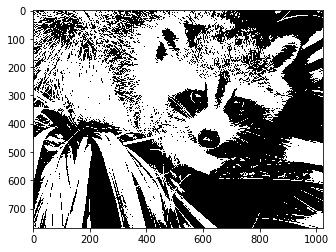

In [9]:
ret, threshold = cv.threshold(grayScale, getThreshold(grayScale), 255, cv.THRESH_BINARY)
plt.imshow(threshold)

### Sum of gray scaled image with original image

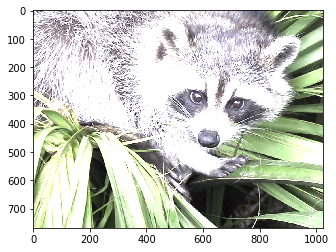

In [10]:
sumImg = cv.add(grayScale, original)
plt.imshow(sumImg)

### Sum original and gray scaled images to another image

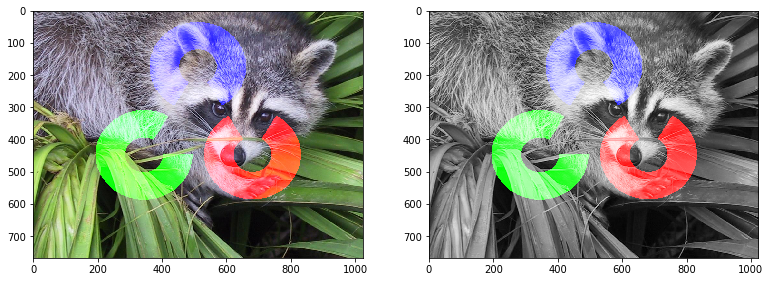

In [11]:
cvLogo = cv.imread('opencv.png')
sumOrig = cv.add(original, cvLogo)
sumGray = cv.add(grayScale, cvLogo)

fig, axarr = plt.subplots(1, 2, figsize=(13, 13))
axarr[0].imshow(sumOrig)
axarr[1].imshow(sumGray)

### Subtraction of gray scaled image from original image

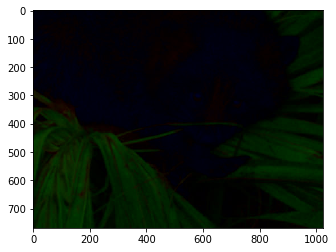

In [12]:
subtImg = cv.subtract(original, grayScale)
plt.imshow(subtImg)

### Subtraction of another image from original and gray scaled images

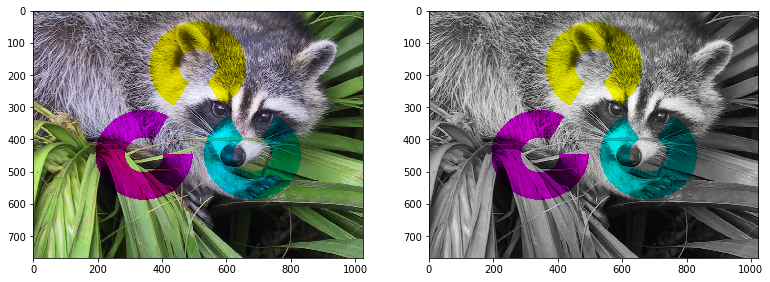

In [13]:
cvLogo = cv.imread('opencv.png')
sumOrig = cv.subtract(original, cvLogo)
sumGray = cv.subtract(grayScale, cvLogo)

fig, axarr = plt.subplots(1, 2, figsize=(13, 13))
axarr[0].imshow(sumOrig)
axarr[1].imshow(sumGray)

### Changing brightness on the original image

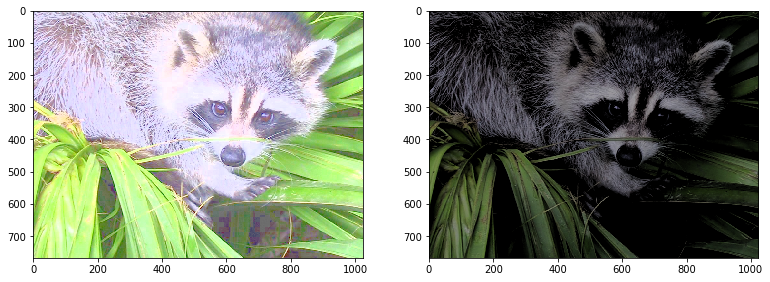

In [14]:
def changeBrightness(img, value):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    if value > 0:
        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] += value
    else:
        value = -value
        lim = value
        v[v <= lim] = 0
        v[v > lim] -= value

    final_hsv = cv.merge((h, s, v))
    img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    
    return img

fig, axarr = plt.subplots(1, 2, figsize = (13, 13))
axarr[0].imshow(changeBrightness(original, 100))
axarr[1].imshow(changeBrightness(original, -100))